In [7]:
import string
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join(word for word in nopunc.split() if word.lower() not in stopwords.words('english'))

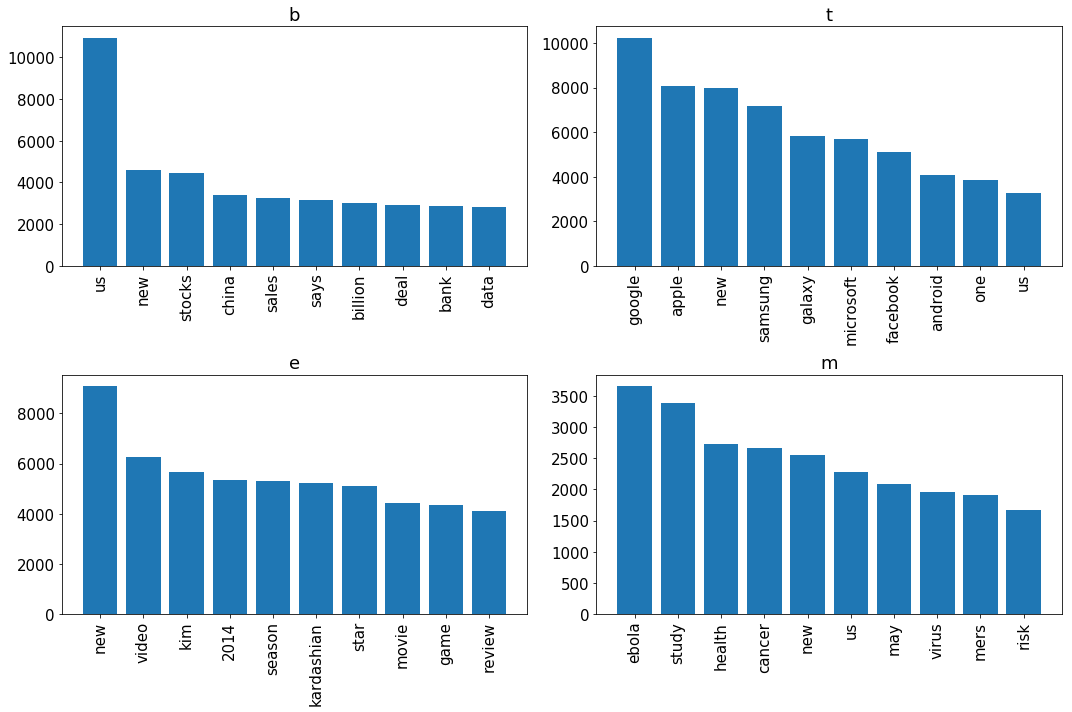

In [9]:
from collections import Counter
plt.figure(figsize=(15,10))
def histogram_label(df):
    i=1
    df_title_category = df[['TITLE','CATEGORY']]
    df_title_category['TITLE']=df_title_category['TITLE'].apply(text_process).str.lower()
    
    categories =df['CATEGORY'].drop_duplicates().tolist()
    for category in categories:
            df_title=df_title_category.query('CATEGORY ==  @category')
            result =" ".join(df_title['TITLE'].values.tolist()).split(" ")
            Counter_=Counter(result).most_common(10)
       
   
            labels = [item[0] for item in Counter_]
            number = [item[1] for item in Counter_]
            nbars = len(Counter_)
            plt.subplot(2,2,i)
            plt.xticks(rotation=90,fontsize=15)
            plt.yticks(fontsize=15)
            plt.title(category, fontsize=18)
            plt.bar(np.arange(nbars), number, tick_label=labels)
            i=i+1
    
    
    
histogram_label(news)   
plt.tight_layout()
plt.show()